# 逻辑回归

该算法尝试为**给定一个输入特征的线性组合的一个二元变量的结果**建模。

举个例子，可以根据候选人为竞选花费的金钱、时间等信息预测选举结果。

逻辑回归工作流程——

给定：

- 数据集合 $\{(x^{(1)},y^{(1)},\ldots,(x^{(m)},y^{(m)})\}$
- 每个 $x^{(i)}$ 都是 $d$ 维向量 $x^{(i)}=(x_1^{(i)},\ldots,x_d^{(i)})$
- 每个 $y^{(i)}$ 都是一个二元目标变量 $y^{(i)} \in \{0,1\}$

逻辑回归模型可以用非常简单的神经网络表达：

- 拥有一个实值权重向量 $w=(w^{(1)},\ldots,w^{(d)})$
- 拥有一个实值偏置 $b$
- 采用sigmoid函数作为激活函数

与[线性回归](./线性回归.ipynb)不同，逻辑回归没有封闭解。

但是成本函数是凸的（*convex*），因此可以采用梯度下降方法来训练该模型。

事实上，梯度下降（或其余任何最优化算法）保证找到全局最小（如果学习率足够小且训练迭代次数足够多）。

训练步骤：

一开始模型参数是初始化了的，接下来重复指定的训练迭代次数或直到参数收敛。

- 第一步

    把权重向量和偏置初始化为零（或小的随机数）

- 第二步

    计算一个输入特性和权重的线性组合。
    
    采用向量化和广播所有训练样本可一次性搞定： $a=X \cdot w + b$
    
    这里 $X$ 是矩阵 $(n_{samples},n_{features})$ 保佑全部训练样本，而 $\cdot$ 表示点积。

- 第三步

    应用sigmoid激活函数，返回值在0和1之间： $$\hat y=\sigma (a)=\frac{1}{1 + \exp(-a)}$$

- 第四步

    计算整个训练集合的成本
    
    就是对介于0和1之间的目标值的概率建模
    
    因此在训练过程中，要修改（*adapt*）参数以致把模型输出高值的样本标记为正（1）、把模型输出低值的样本标记为负（0）
    
    在成本函数中体现： $$J(w,b)=-\frac{1}{m} \sum_{i=1}^m \Big[y^{(i)}\log(\hat y^{(i)}) + (1 - y^{{i}}) \Big(1 - \log(\hat y^{(i)}) \Big) \Big]$$

- 第五步

    计算关于权重向量和偏置的成本函数梯度，[证明过程](./逻辑回归成本函数推到过程.ipynb)
    
    公式： $\frac{\partial J}{\partial w_j}=\frac{1}{m} \sum_{i=1}^m \Big[\hat y^{(i)} - y^{(i)} \Big]x_j^{(i)}$
    
    对于偏置，输入 $x_j^{(i)}$ 则按 $1$ 给予

- 第六步

    更新权重和偏置： $$w=w - \eta \nabla_wJ$$ $$b=b - \eta \nabla_bJ$$
    
    其中 $\nabla$ 即学习率

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

np.random.seed(123)

## 数据集合

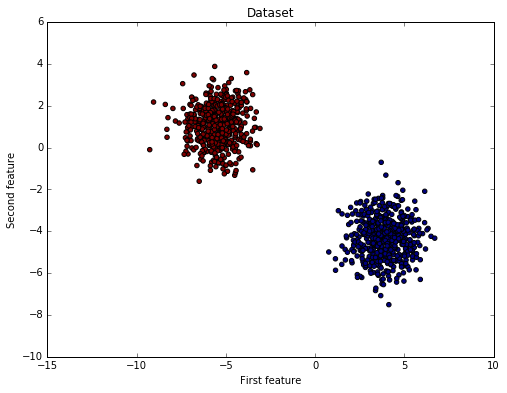

In [3]:
# 将会采用两类玩具简单数据集合来跑逻辑回归
X, y_true = make_blobs(n_samples=1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
# 重塑目标来获取(n_samples, 1)的列向量
y_true = y_true[:, np.newaxis]
# 把数据分割成训练集合和测试集合
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print "Shape X_train is {0}".format(X_train.shape)
print "Shape y_train is {0}".format(y_train.shape)
print "Shape X_test is {0}".format(X_test.shape)
print "Shape y_test is {0}".format(y_test.shape)

Shape X_train is (750L, 2L)
Shape y_train is (750L, 1L)
Shape X_test is (250L, 2L)
Shape y_test is (250L, 1L)


## 逻辑回归类

In [5]:
class LogisticRegression:
    def __init__(self): pass
    def sigmoid(self, a):
        return 1.0 / (1 + np.exp(-a))
    def train(self, X, y_true, n_iters, learning_rate):
        '''在给定的数据X和目标y上训练逻辑回归模型'''
        # 第一步：初始化参数
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            # 第二步：计算输入特性和权重的线性组合
            # 第三步：应用sigmoid激活函数
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # 第四步：计算整个训练集合的成本
            cost = (-1.0 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
            
            # 第五步：计算梯度
            dw = (1.0 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1.0 / n_samples) * np.sum(y_predict - y_true)
            
            # 第六步：更新参数
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db
            
            costs.append(cost)
            if i%100 == 0:
                print "Cost after iteration {i}: {cost}".format(i=i, cost=cost)
        
        return self.weights, self.bias, costs
    def predict(self, X):
        '''预测一组样本X的二元标签'''
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]
        
        return np.array(y_predict_labels)[:, np.newaxis]

## 初始化并训练模型

Cost after iteration 0: 0.69314718056
Cost after iteration 100: 0.0465140029356
Cost after iteration 200: 0.02405337744
Cost after iteration 300: 0.0163544081514
Cost after iteration 400: 0.012445770522
Cost after iteration 500: 0.0100739817929


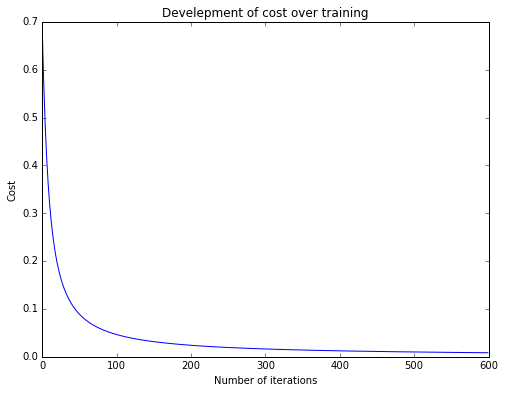

In [6]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Develepment of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## 测试模型

In [7]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print "train accuracy: {0}%%".format(100 - np.mean(np.abs(y_p_train - y_train)) * 100)
print "test accuracy: {0}%%".format(100 - np.mean(np.abs(y_p_test - y_test)) * 100)

train accuracy: 100.0%%
test accuracy: 100.0%%
